<a href="https://colab.research.google.com/github/Jestika-safitri/jestika/blob/main/lexicond.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
import pandas as pd
data = pd.read_csv("databersihfinaljestika.csv")
data = data.dropna()
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                               posts
0  kerap termarjinalisasi perempuan perempuan pen...
1  tindakan semacam ini dapat dilaporkan kepada p...
2         inilah contoh kekerasan dalam rumah tangga
3  sertu iswanto babinsa kalurahan srihatjo bersa...
4  kerap termarjinalisasi perempuan perempuan pen...


In [ ]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["posts"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["posts"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["posts"]]
data['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data["posts"]]
data.head()

,posts,Positive,Negative,Neutral,Compound
0,kerap termarjinalisasi perempuan perempuan pen...,0.0,0.0,1.0,0.0
1,tindakan semacam ini dapat dilaporkan kepada p...,0.0,0.0,1.0,0.0
2,inilah contoh kekerasan dalam rumah tangga,0.0,0.0,1.0,0.0
3,sertu iswanto babinsa kalurahan srihatjo bersa...,0.0,0.0,1.0,0.0
4,kerap termarjinalisasi perempuan perempuan pen...,0.0,0.0,1.0,0.0


In [ ]:
score = data["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data["Sentiment"] = sentiment
data.head()

,posts,Positive,Negative,Neutral,Compound,Sentiment
0,kerap termarjinalisasi perempuan perempuan pen...,0.0,0.0,1.0,0.0,Neutral
1,tindakan semacam ini dapat dilaporkan kepada p...,0.0,0.0,1.0,0.0,Neutral
2,inilah contoh kekerasan dalam rumah tangga,0.0,0.0,1.0,0.0,Neutral
3,sertu iswanto babinsa kalurahan srihatjo bersa...,0.0,0.0,1.0,0.0,Neutral
4,kerap termarjinalisasi perempuan perempuan pen...,0.0,0.0,1.0,0.0,Neutral


In [ ]:
print(data["Sentiment"].value_counts())

Neutral     2430
Negative     154
Positive     125
Name: Sentiment, dtype: int64


In [ ]:
data.to_csv("new_data.csv")

In [ ]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import xgboost as xgb

In [ ]:
filename = "new_data.csv"
df = pd.read_csvdf = pd.read_csv("new_data.csv", sep=";")
df.head()

,",posts,Positive,Negative,Neutral,Compound,Sentiment"
0,"0,kerap termarjinalisasi perempuan perempuan p..."
1,"1,tindakan semacam ini dapat dilaporkan kepada..."
2,"2,inilah contoh kekerasan dalam rumah tangga,0..."
3,"3,sertu iswanto babinsa kalurahan srihatjo ber..."
4,"4,kerap termarjinalisasi perempuan perempuan p..."


In [ ]:

def token(posts):
  nstr = posts.split(' ')
  data= []
  a = -1
  for hu in nstr:
      a = a + 1
  if hu == '':
      data.append(a)
  p = 0
  b = 0
  for q in data:
      b = q - p
      del nstr[b]
      p = p + 1
  return nstr
data['posts'] = data['posts'].apply(token)
data.head(10)

,posts,Positive,Negative,Neutral,Compound,Sentiment
0,"[kerap, termarjinalisasi, perempuan, perempuan...",0.0,0.0,1.0,0.0,Neutral
1,"[tindakan, semacam, ini, dapat, dilaporkan, ke...",0.0,0.0,1.0,0.0,Neutral
2,"[inilah, contoh, kekerasan, dalam, rumah, tangga]",0.0,0.0,1.0,0.0,Neutral
3,"[sertu, iswanto, babinsa, kalurahan, srihatjo,...",0.0,0.0,1.0,0.0,Neutral
4,"[kerap, termarjinalisasi, perempuan, perempuan...",0.0,0.0,1.0,0.0,Neutral
5,"[spktpolresacehtimur, menerima, laporan, terha...",0.0,0.0,1.0,0.0,Neutral
6,"[tw, kekerasan, dalam, rumah, tangga, kdrt]",0.0,0.0,1.0,0.0,Neutral
7,"[tw, kekerasan, dalam, rumah, tangga, kdrt]",0.0,0.0,1.0,0.0,Neutral
8,"[kasus, kekerasan, dalam, rumah, tangga, kdrt,...",0.0,0.0,1.0,0.0,Neutral
9,"[dalam, kehidupan, rumah, tangga, perbedaan, p...",0.0,0.0,1.0,0.0,Neutral


In [ ]:
#proses filtering
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
           filtered.append(txt)
    text = filtered
    return text
    data['posts'] = data['posts'].apply(stopword_removal)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,posts,Positive,Negative,Neutral,Compound,Sentiment
0,"[kerap, termarjinalisasi, perempuan, perempuan...",0.0,0.0,1.0,0.0,Neutral
1,"[tindakan, semacam, ini, dapat, dilaporkan, ke...",0.0,0.0,1.0,0.0,Neutral
2,"[inilah, contoh, kekerasan, dalam, rumah, tangga]",0.0,0.0,1.0,0.0,Neutral
3,"[sertu, iswanto, babinsa, kalurahan, srihatjo,...",0.0,0.0,1.0,0.0,Neutral
4,"[kerap, termarjinalisasi, perempuan, perempuan...",0.0,0.0,1.0,0.0,Neutral
5,"[spktpolresacehtimur, menerima, laporan, terha...",0.0,0.0,1.0,0.0,Neutral
6,"[tw, kekerasan, dalam, rumah, tangga, kdrt]",0.0,0.0,1.0,0.0,Neutral
7,"[tw, kekerasan, dalam, rumah, tangga, kdrt]",0.0,0.0,1.0,0.0,Neutral
8,"[kasus, kekerasan, dalam, rumah, tangga, kdrt,...",0.0,0.0,1.0,0.0,Neutral
9,"[dalam, kehidupan, rumah, tangga, perbedaan, p...",0.0,0.0,1.0,0.0,Neutral


In [ ]:
  print(data["posts"].value_counts())

[kekerasan, dalam, rumah, tangga]                                                                                                                                                                                                                                                                  52
[tidak, hanya, pendampingan, perempuan, melalui, program, destara, desa, sejahtera, peduli, perempuan, dan, anak, di, bkow, juga, akan, mendampingi, korban, kekerasan, dalam, rumah, tangga]                                                                                                      22
[perancang, kanwil, kemenkumham, sulsel, zonasi, bone, jg, terkait, terjadinya, kekerasan, dalam, rumah, tangga, kemiskinan, dan, rendahnya, kualitas, sumber, daya, manusia, liberti, sitinjak]                                                                                                   17
[cukupkah, speak, up, hentikan, fenomena, kdrt, serba, serbi, mmc, baru, baru, ini, pemberitaan, media, tentang, kasus

In [ ]:
data.to_csv("datajestika.csv")

In [ ]:
# prosess stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmingText(posts): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text
    data['posts'] = data['posts'].apply(stemming)

    data.to_csv('datajestika.csv', index=False)
    data_clean = pd.read_csv('datajestika.csv', encoding='latih1')
    data_clean.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nltk

In [ ]:
import nltk
nltk.download('popular')

In [ ]:
pip install pySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 5.3 MB/s eta 0:00:00


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
f= open('databersihfinaljestika.csv')
posts = f.read()
print(posts)

posts
kerap termarjinalisasi perempuan perempuan penyintas kekerasan dalam rumah tangga kdrt sebetulnya mampu bangkit dan mengambil alih perekonomian mereka untuk mendukung keluarganya
tindakan semacam ini dapat dilaporkan kepada polisi sebagai tindakan kekerasan seksual atau kekerasan dalam rumah tangga korban dapat menghubungi polisi untuk meminta bantuan dan perlindungan serta meminta agar pelaku dituntut sesuai dengan huk
inilah contoh kekerasan dalam rumah tangga
sertu iswanto babinsa kalurahan srihatjo bersama bhabinkamtibmas menghadiri undangan penyuluhan perlindungan anak dan kekerasan dalam rumah tangga di pendopo kalurahan sriharjo
kerap termarjinalisasi perempuan perempuan penyintas kekerasan dalam rumah tangga kdrt sebetulnya mampu bangkit dan mengambil alih perekonomian mereka untuk mendukung keluarganya
spktpolresacehtimur menerima laporan terhadap masyarakat dalam perkara tindak pidana penelantaran dan perlakuan salah pada anak serta kekerasan dalam rumah tangga
tw keker

In [ ]:
word_tokens = word_tokenize(posts)
print(word_tokens)

['posts', 'kerap', 'termarjinalisasi', 'perempuan', 'perempuan', 'penyintas', 'kekerasan', 'dalam', 'rumah', 'tangga', 'kdrt', 'sebetulnya', 'mampu', 'bangkit', 'dan', 'mengambil', 'alih', 'perekonomian', 'mereka', 'untuk', 'mendukung', 'keluarganya', 'tindakan', 'semacam', 'ini', 'dapat', 'dilaporkan', 'kepada', 'polisi', 'sebagai', 'tindakan', 'kekerasan', 'seksual', 'atau', 'kekerasan', 'dalam', 'rumah', 'tangga', 'korban', 'dapat', 'menghubungi', 'polisi', 'untuk', 'meminta', 'bantuan', 'dan', 'perlindungan', 'serta', 'meminta', 'agar', 'pelaku', 'dituntut', 'sesuai', 'dengan', 'huk', 'inilah', 'contoh', 'kekerasan', 'dalam', 'rumah', 'tangga', 'sertu', 'iswanto', 'babinsa', 'kalurahan', 'srihatjo', 'bersama', 'bhabinkamtibmas', 'menghadiri', 'undangan', 'penyuluhan', 'perlindungan', 'anak', 'dan', 'kekerasan', 'dalam', 'rumah', 'tangga', 'di', 'pendopo', 'kalurahan', 'sriharjo', 'kerap', 'termarjinalisasi', 'perempuan', 'perempuan', 'penyintas', 'kekerasan', 'dalam', 'rumah', 'tan

In [ ]:
stop_words = set(stopwords.words('indonesian'))
word_tokens_stopwords = [w for w in word_tokens if not w in stop_words]
print(word_tokens_stopwords)

['posts', 'kerap', 'termarjinalisasi', 'perempuan', 'perempuan', 'penyintas', 'kekerasan', 'rumah', 'tangga', 'kdrt', 'bangkit', 'mengambil', 'alih', 'perekonomian', 'mendukung', 'keluarganya', 'tindakan', 'dilaporkan', 'polisi', 'tindakan', 'kekerasan', 'seksual', 'kekerasan', 'rumah', 'tangga', 'korban', 'menghubungi', 'polisi', 'bantuan', 'perlindungan', 'pelaku', 'dituntut', 'sesuai', 'huk', 'contoh', 'kekerasan', 'rumah', 'tangga', 'sertu', 'iswanto', 'babinsa', 'kalurahan', 'srihatjo', 'bhabinkamtibmas', 'menghadiri', 'undangan', 'penyuluhan', 'perlindungan', 'anak', 'kekerasan', 'rumah', 'tangga', 'pendopo', 'kalurahan', 'sriharjo', 'kerap', 'termarjinalisasi', 'perempuan', 'perempuan', 'penyintas', 'kekerasan', 'rumah', 'tangga', 'kdrt', 'bangkit', 'mengambil', 'alih', 'perekonomian', 'mendukung', 'keluarganya', 'spktpolresacehtimur', 'menerima', 'laporan', 'masyarakat', 'perkara', 'tindak', 'pidana', 'penelantaran', 'perlakuan', 'salah', 'anak', 'kekerasan', 'rumah', 'tangga',

In [ ]:
freq_kata_1 = nltk.FreqDist(word_tokens)
freq_kata_2 = nltk.FreqDist(word_tokens_stopwords)
print(freq_kata_1.most_common(20))
print(freq_kata_2.most_common(20))

[('dalam', 3061), ('kekerasan', 2956), ('rumah', 2919), ('tangga', 2863), ('kdrt', 1648), ('yang', 1032), ('billar', 824), ('lesti', 824), ('rizky', 800), ('dan', 798), ('kejora', 724), ('kasus', 710), ('di', 620), ('ini', 503), ('itu', 346), ('dugaan', 335), ('terhadap', 291), ('dengan', 282), ('dari', 279), ('korban', 271)]
[('kekerasan', 2956), ('rumah', 2919), ('tangga', 2863), ('kdrt', 1648), ('billar', 824), ('lesti', 824), ('rizky', 800), ('kejora', 724), ('dugaan', 335), ('korban', 271), ('anak', 231), ('perempuan', 228), ('laporan', 220), ('yg', 204), ('suaminya', 191), ('polisi', 188), ('jakarta', 182), ('polres', 175), ('istrinya', 167), ('selatan', 166)]


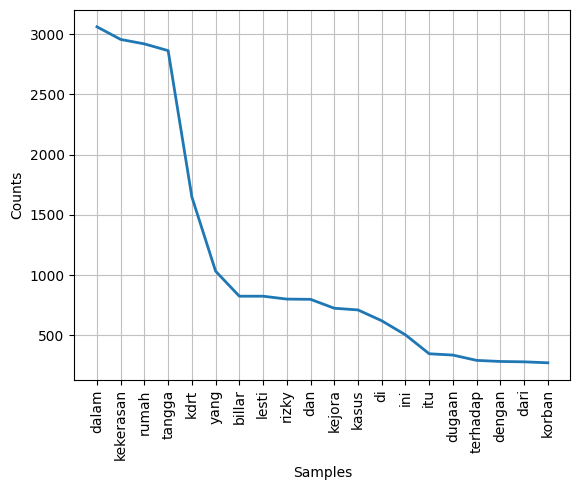

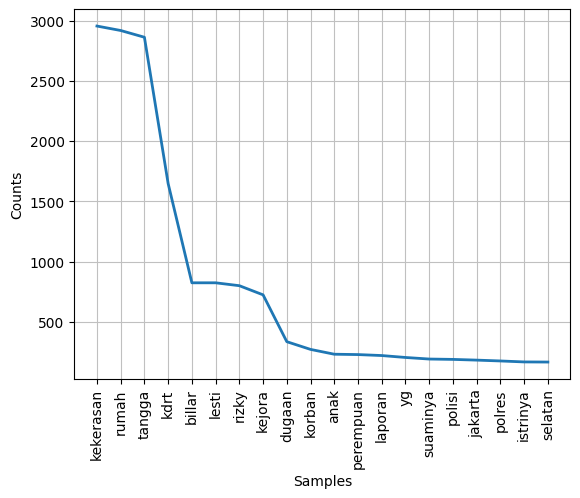

In [ ]:
freq_kata_1.plot(20)
freq_kata_2.plot(20)

plt.show()

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
f = open("databersihfinaljestika.csv")
isi_text = f.read()
print(isi_text)

posts
kerap termarjinalisasi perempuan perempuan penyintas kekerasan dalam rumah tangga kdrt sebetulnya mampu bangkit dan mengambil alih perekonomian mereka untuk mendukung keluarganya
tindakan semacam ini dapat dilaporkan kepada polisi sebagai tindakan kekerasan seksual atau kekerasan dalam rumah tangga korban dapat menghubungi polisi untuk meminta bantuan dan perlindungan serta meminta agar pelaku dituntut sesuai dengan huk
inilah contoh kekerasan dalam rumah tangga
sertu iswanto babinsa kalurahan srihatjo bersama bhabinkamtibmas menghadiri undangan penyuluhan perlindungan anak dan kekerasan dalam rumah tangga di pendopo kalurahan sriharjo
kerap termarjinalisasi perempuan perempuan penyintas kekerasan dalam rumah tangga kdrt sebetulnya mampu bangkit dan mengambil alih perekonomian mereka untuk mendukung keluarganya
spktpolresacehtimur menerima laporan terhadap masyarakat dalam perkara tindak pidana penelantaran dan perlakuan salah pada anak serta kekerasan dalam rumah tangga
tw keker

In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200,background_color='white')
wordcloud.generate(isi_text)

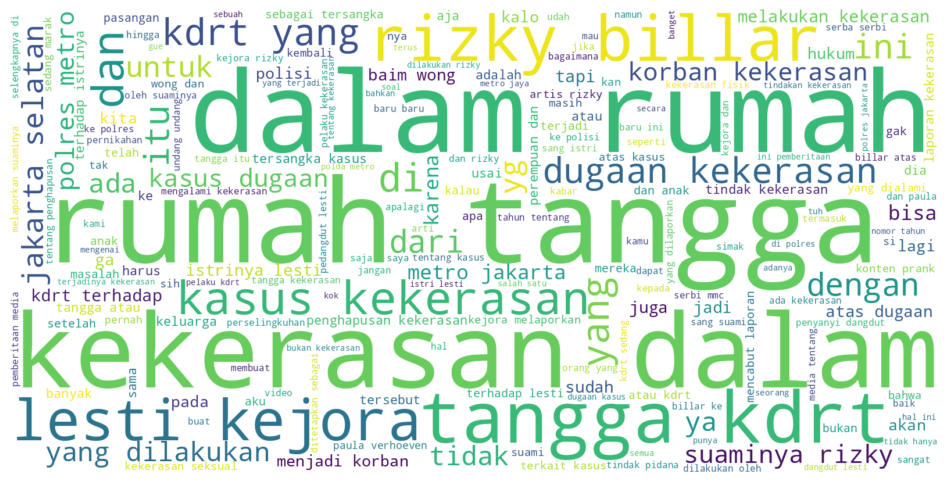

In [ ]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
X = df[['tweet_cleans', 'sentimen','label_sentimen']]
y = df[['tweet_cleans', 'sentimen','label_sentimen']]
print(X.shape)
print(y.shape)
     

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)